In [4]:
import sys
sys.path.append("../")
from tfMFs.tfCMF import tfCMF
from dataset import create_synthetic_data
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
df = pd.read_csv("/home/ryo_matsui/notebook/mydata/ToxicComment/jigsaw-toxic-comment-train.csv")

In [6]:
vectorizer = CountVectorizer(min_df=3, max_df=0.9, stop_words="english", binary=True)
X = vectorizer.fit_transform(df.head(10000).comment_text)
y = df.head(10000).toxic.values

In [7]:
train_data = X.A
test_data = X.A
y = y[:,np.newaxis]

In [8]:
cmf = tfCMF(y, alpha=0.7, d_hidden=10, lamda=1)
U, V, Z, train_loss_SGD, _ = cmf.train(train_data, test_data, optim_steps=100, verbose=10, early_stopping=5, lr=0.001, optimizer="SGD")

[Info] At time-step 0, valid data loss is -4879.04443359375
[Info] At time-step 10, valid data loss is -5421.19287109375
[Info] At time-step 20, valid data loss is -5642.50634765625
[Info] At time-step 30, valid data loss is -5770.3583984375
[Info] At time-step 40, valid data loss is -5863.18359375
[Info] At time-step 50, valid data loss is -5939.77734375
[Info] At time-step 60, valid data loss is -6007.19384765625
[Info] At time-step 70, valid data loss is -6067.95166015625
[Info] At time-step 80, valid data loss is -6123.6552734375
[Info] At time-step 90, valid data loss is -6175.96923828125


In [9]:
cmf = tfCMF(y, alpha=0.7, d_hidden=10, lamda=1)
U, V, Z, train_loss_Adam, _ = cmf.train(train_data, test_data, optim_steps=100, verbose=10, early_stopping=5,lr=0.001, optimizer="Adam")

[Info] At time-step 0, valid data loss is -4879.04443359375
[Info] At time-step 10, valid data loss is -5205.236328125
[Info] At time-step 20, valid data loss is -5354.626953125
[Info] At time-step 30, valid data loss is -5432.31103515625
[Info] At time-step 40, valid data loss is -5475.7470703125
[Info] At time-step 50, valid data loss is -5502.0263671875
[Info] At time-step 60, valid data loss is -5519.49755859375
[Info] At time-step 70, valid data loss is -5532.51416015625
[Info] At time-step 80, valid data loss is -5543.26123046875
[Info] At time-step 90, valid data loss is -5552.9033203125


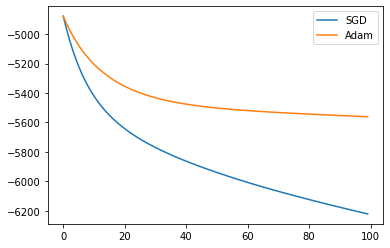

In [10]:
plt.plot(np.arange(0,100),train_loss_SGD, label="SGD")
plt.plot(np.arange(0,100),train_loss_Adam, label="Adam")
plt.legend()
plt.show()